#### source- https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

https://hdbscan.readthedocs.io/en/latest/outlier_detection.html

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
iris_df = datasets.load_iris()

In [3]:
x = iris_df.data
y = iris_df.target

In [4]:
# Creating the KMeans object and fitting it to the Iris data
iris_kmeans = KMeans(n_clusters=3)
iris_kmeans.fit(x)

KMeans(n_clusters=3)

In [5]:
# Predicting the cluster labels
labels = iris_kmeans.predict(x)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [6]:
# Finding the final centroids
centroids = iris_kmeans.cluster_centers_

In [7]:
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
# Evaluating the quality of clusters
s = metrics.silhouette_score(x, labels, metric='euclidean')
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Iris Dataset Clusters: 0.55


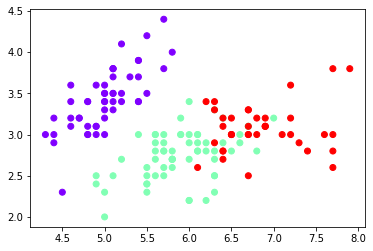

In [9]:
# plotting the clusters using sepal_length and sepal_width
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap="rainbow")
plt.show()

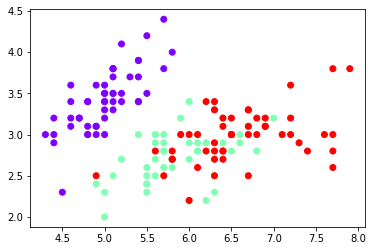

In [10]:
# plotting the clusters using sepal_length and sepal_width on actual labels
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="rainbow")
plt.show()

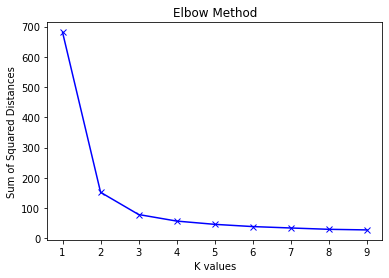

In [11]:
# Find optimal number of clusters
# Arbitrarily selecting a range of values for K
K = range(1,10)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(x)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

## Hirarchical clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(x)

AgglomerativeClustering(n_clusters=3)

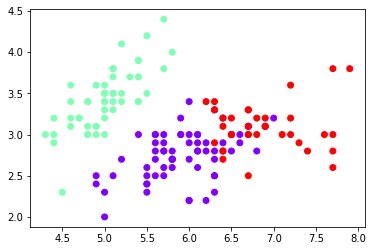

In [36]:
labels=model.labels_
# plotting the clusters using sepal_length and sepal_width
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap="rainbow")
plt.show()

## DBSCAN Clustering

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
iris_dbscan = DBSCAN(eps=0.5, min_samples=5)
iris_dbscan.fit(x)
labels = iris_dbscan.labels_

In [16]:
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


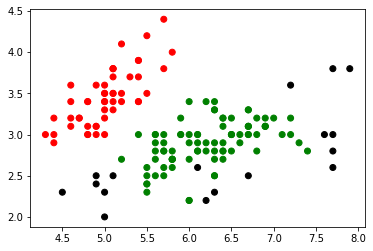

In [17]:
# plotting the clusters using sepal_length and sepal_width
def map_color(lb):
    if lb==-1:
        colr = "black"
    elif lb==0:
        colr= "red"
    else:
        colr="green"
    return colr
    
color= [map_color(l) for l in labels]

plt.scatter(x[:, 0], x[:, 1], c=color, cmap="rainbow")
plt.show()

In [18]:
# Creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels, dtype=bool)
# Setting core and border points (all points that are not -1) to True
core_samples_mask[iris_dbscan.core_sample_indices_] = True

In [19]:
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [20]:
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [21]:
# Printing the number of clusters and number of noise points (outliers)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 17


In [22]:
# Evaluating the quality of clusters
s = metrics.silhouette_score(x, iris_dbscan.labels_)
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Iris Dataset Clusters: 0.49


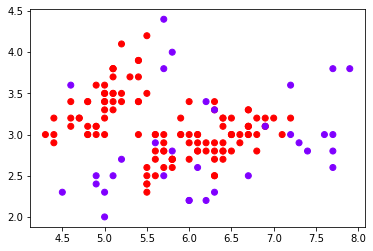

In [23]:
# plotting the clusters using sepal_length and sepal_width
plt.scatter(x[:, 0], x[:, 1], c=core_samples_mask, cmap="rainbow")
plt.show()

In [24]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

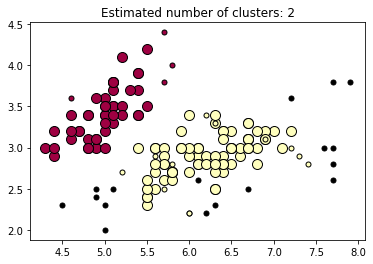

In [25]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = "k"
    
    class_member_mask = (labels == k)
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=10)
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=5)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Finding Optimal Value of EPS (Knee Method)

[0.         0.         0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508
 0.17320508 0.17320508 0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.2236068  0.2236068  0.2236068  0.2236068  0.2236068  0.2236068
 0.2236068  0.2236068  0.2236068  0.2236068  0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.26457513 0.26457513
 0.26457513 0.26457513 0

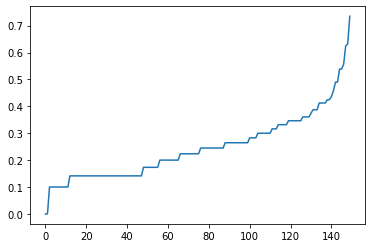

In [26]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(x)
distances, indices = nearest_neighbors.kneighbors(x)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

### The optimal value should be the value at which we see maximum curvature which in this case seems to be near 0.5.

# HDBScan

In [27]:
import hdbscan

In [28]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
cluster_labels = clusterer.fit_predict(x)

In [29]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

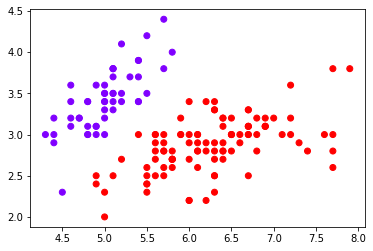

In [30]:
# plotting the clusters using sepal_length and sepal_width
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap="rainbow")
plt.show()

In [31]:
point_sizes = clusterer.outlier_scores_ 

In [32]:
point_sizes

array([0.00000000e+00, 0.00000000e+00, 7.41799002e-02, 2.25403331e-01,
       1.83503419e-01, 3.20633780e-01, 1.83503419e-01, 1.83503419e-01,
       2.25403331e-01, 0.00000000e+00, 1.83503419e-01, 1.33974596e-01,
       1.33974596e-01, 2.92893219e-01, 5.52786405e-01, 6.02640293e-01,
       3.67544468e-01, 1.83503419e-01, 4.77767032e-01, 1.30535036e-15,
       3.20633780e-01, 2.17558393e-15, 5.19615539e-01, 3.45346329e-01,
       4.05911474e-01, 2.25403331e-01, 3.67544468e-01, 0.00000000e+00,
       0.00000000e+00, 2.25403331e-01, 0.00000000e+00, 1.83503419e-01,
       3.45346329e-01, 3.67544468e-01, 0.00000000e+00, 2.25403331e-01,
       2.61451054e-01, 7.41799002e-02, 1.83503419e-01, 0.00000000e+00,
       1.83503419e-01, 6.81103598e-01, 1.83503419e-01, 2.25403331e-01,
       4.05911474e-01, 1.33974596e-01, 1.52290875e-15, 2.25403331e-01,
       1.30535036e-15, 3.67544468e-01, 5.40946971e-02, 8.71290708e-02,
       1.54476673e-15, 2.92893219e-01, 3.63758883e-02, 2.92893219e-01,
      

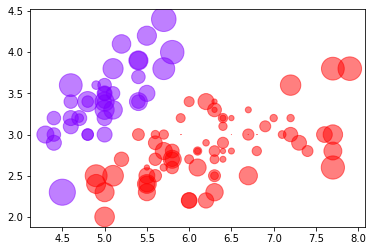

In [33]:
# plotting the clusters using sepal_length and sepal_width
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap="rainbow", s=point_sizes*1000, alpha=0.5)
plt.show()

<AxesSubplot:ylabel='distance'>

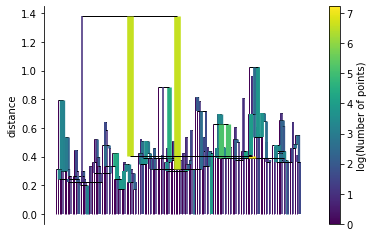

In [34]:
clusterer = hdbscan.RobustSingleLinkage()
cluster_labels = clusterer.fit_predict(x)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()